In [64]:
#RF-SST Predict

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드
df = pd.read_csv('data.csv')

# 누락된 데이터 제거
df = df.dropna()

# Date에서 연도와 월 추출하여 새로운 열로 추가
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# 특징과 라벨 분리
features = df[['NDVIsample', 'Year', 'Month', 'longitude', 'latitude', 'Temp', 'Windspeed', 'Winddirection', 'Solar']]
labels = df['SST']

# 훈련 데이터와 테스트 데이터 분리 (8:2)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 생성
predictions = model.predict(X_test)

# RMSE, R^2
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

# 결과 출력
print(f"Test R^2: {r2}")
print(f"Test RMSE: {rmse}")

# 훈련 데이터에 대한 예측 생성
predictions_train = model.predict(X_train)

# RMSE, R^2
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
r2_train = r2_score(y_train, predictions_train)

# 결과 출력
print(f"Train R^2: {r2_train}")
print(f"Train RMSE: {rmse_train}")

Test R^2: 0.9998793391618924
Test RMSE: 0.019541573864037088
Train R^2: 0.99998160635831
Train RMSE: 0.0076453822901132494


In [53]:
# RF 모델로 Chl 예측
SST_pred = model.predict(features)

# 예측 결과를 데이터프레임에 추가
df['SST'] = SST_pred

# 결과 저장
result = df[['X', 'Y', 'SST']]
result.to_csv('SST_prediction_RF.csv', index=False)

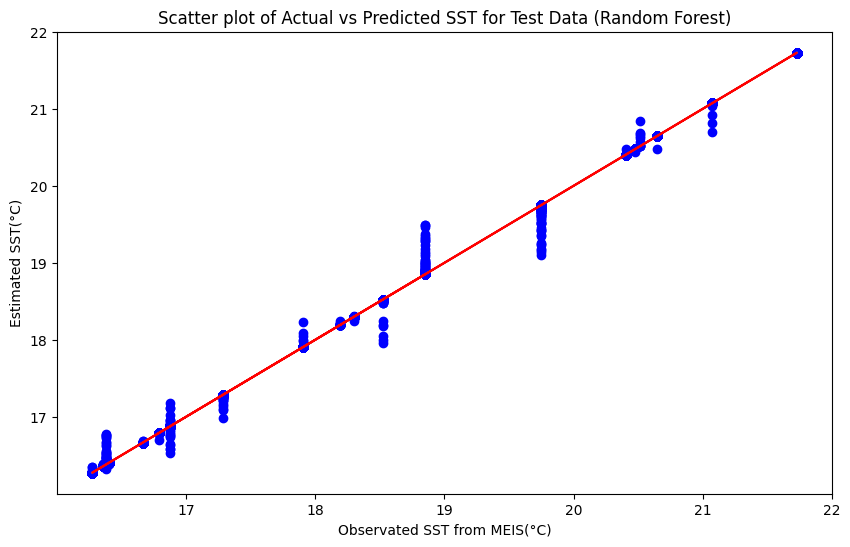

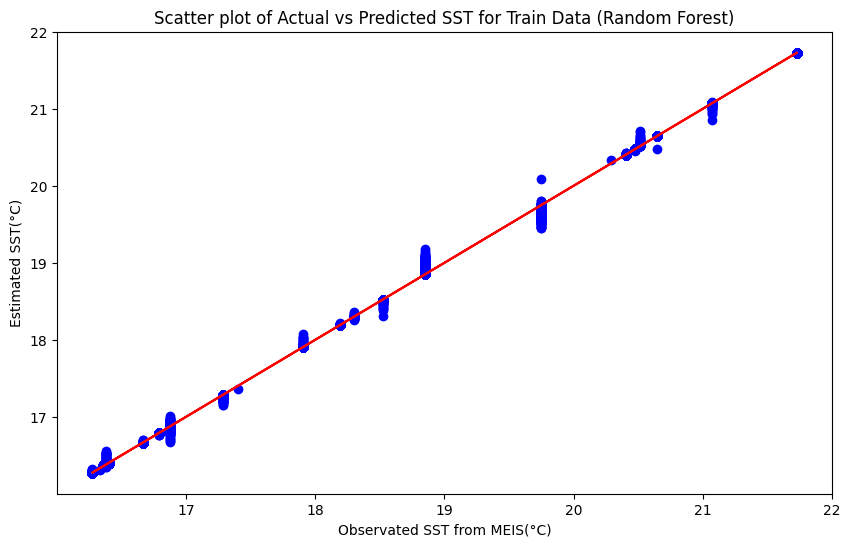

In [65]:
import matplotlib.pyplot as plt

# 테스트 데이터에 대한 산포도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, c='blue')  # 파란색 점으로 실제값과 예측값의 관계를 표현
plt.xlabel('Observated SST from MEIS(°C)')
plt.ylabel('Estimated SST(°C)')
plt.title('Scatter plot of Actual vs Predicted SST for Test Data (Random Forest)')

# 회색선으로 기준선을 표현
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='gray')

# 빨간선으로 회귀선을 표현
m, b = np.polyfit(y_test, predictions, 1)  # 1차 회귀분석으로 기울기와 절편을 구함
plt.plot(y_test, m*y_test + b, color='red')

plt.show()

# 훈련 데이터에 대한 산포도
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predictions_train, c='blue')  # 파란색 점으로 실제값과 예측값의 관계를 표현
plt.xlabel('Observated SST from MEIS(°C)')
plt.ylabel('Estimated SST(°C)')
plt.title('Scatter plot of Actual vs Predicted SST for Train Data (Random Forest)')

# 회색선으로 기준선을 표현
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='gray')

# 빨간선으로 회귀선을 표현
m, b = np.polyfit(y_train, predictions_train, 1)  # 1차 회귀분석으로 기울기와 절편을 구함
plt.plot(y_train, m*y_train + b, color='red')

plt.show()

In [66]:
#RF-Chl Predict

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 데이터 로드
df = pd.read_csv('data.csv')

# 누락된 데이터 제거
df = df.dropna()

# Date에서 연도와 월 추출하여 새로운 열로 추가
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# 특징과 라벨 분리
features = df[['NDVIsample', 'Year', 'Month', 'longitude', 'latitude', 'Temp', 'Windspeed', 'Winddirection', 'Solar', 'SST']]
labels = df['Chl']

# 훈련 데이터와 테스트 데이터 분리 (8:2)
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 랜덤 포레스트 모델 생성 및 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측 생성
predictions = model.predict(X_test)

# RMSE, R^2
rmse = np.sqrt(mean_squared_error(y_test, predictions))
r2 = r2_score(y_test, predictions)

# 결과 출력
print(f"Test R^2: {r2}")
print(f"Test RMSE: {rmse}")

# 훈련 데이터에 대한 예측 생성
predictions_train = model.predict(X_train)

# RMSE, R^2
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
r2_train = r2_score(y_train, predictions_train)

# 결과 출력
print(f"Train R^2: {r2_train}")
print(f"Train RMSE: {rmse_train}")

Test R^2: 0.9999999942636786
Test RMSE: 8.101881712529221e-05
Train R^2: 0.9999951867770258
Train RMSE: 0.0023540215248128134


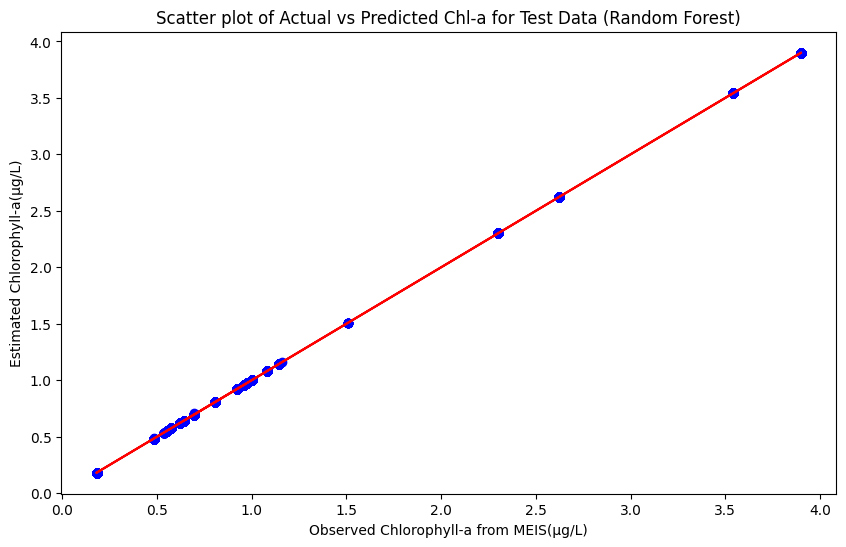

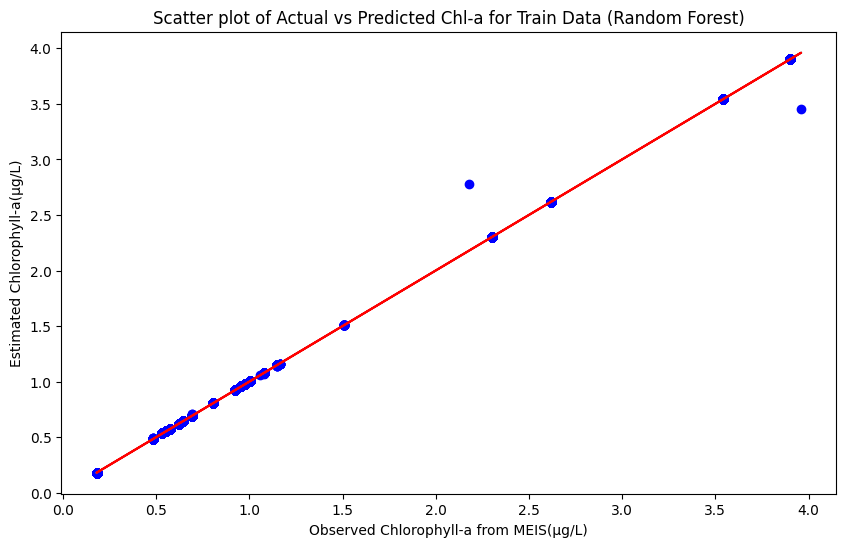

In [68]:
import matplotlib.pyplot as plt

# 테스트 데이터에 대한 산포도
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, c='blue')  # 파란색 점으로 실제값과 예측값의 관계를 표현
plt.xlabel('Observed Chlorophyll-a from MEIS(μg/L)')
plt.ylabel('Estimated Chlorophyll-a(μg/L)')
plt.title('Scatter plot of Actual vs Predicted Chl-a for Test Data (Random Forest)')

# 회색선으로 기준선을 표현
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='gray')

# 빨간선으로 회귀선을 표현
m, b = np.polyfit(y_test, predictions, 1)  # 1차 회귀분석으로 기울기와 절편을 구함
plt.plot(y_test, m*y_test + b, color='red')

plt.show()

# 훈련 데이터에 대한 산포도
plt.figure(figsize=(10, 6))
plt.scatter(y_train, predictions_train, c='blue')  # 파란색 점으로 실제값과 예측값의 관계를 표현
plt.xlabel('Observed Chlorophyll-a from MEIS(μg/L)')
plt.ylabel('Estimated Chlorophyll-a(μg/L)')
plt.title('Scatter plot of Actual vs Predicted Chl-a for Train Data (Random Forest)')

# 회색선으로 기준선을 표현
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='gray')

# 빨간선으로 회귀선을 표현
m, b = np.polyfit(y_train, predictions_train, 1)  # 1차 회귀분석으로 기울기와 절편을 구함
plt.plot(y_train, m*y_train + b, color='red')

plt.show()

In [44]:
# RF 모델로 Chl 예측
Chl_pred = model.predict(features)

# 예측 결과를 데이터프레임에 추가
df['Chl'] = Chl_pred

# 결과 저장
result = df[['X', 'Y', 'Chl']]
result.to_csv('Chl_prediction_RF.csv', index=False)